In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("pitch_swing.csv")

In [4]:
player_avg_data = df.groupby('player_name').agg(
    avg_swing_length=('swing_length', 'mean'),
    avg_bat_speed=('bat_speed', 'mean'),
    woba_value=('woba_value', 'mean')
).reset_index()

In [5]:
player_avg_data

,player_name,avg_swing_length,avg_bat_speed,woba_value
0,"Abrams, CJ",7.365126,70.224533,0.365176
1,"Abreu, José",6.994067,71.232184,0.177670
2,"Abreu, Wilyer",7.321706,72.818641,0.362255
3,"Acuña Jr., Ronald",7.512827,74.580044,0.329803
4,"Adames, Willy",8.087973,72.580638,0.322585
...,...,...,...,...
554,"Yelich, Christian",7.404644,71.339515,0.381116
555,"Yoshida, Masataka",7.189295,69.138296,0.309426
556,"Young, Jacob",6.515986,63.034302,0.318219
557,"Zavala, Seby",7.185108,65.931641,0.237500


In [6]:
player_avg_data.loc[player_avg_data['player_name'] == 'Judge, Aaron']

,player_name,avg_swing_length,avg_bat_speed,woba_value
241,"Judge, Aaron",8.111489,75.205648,0.500588


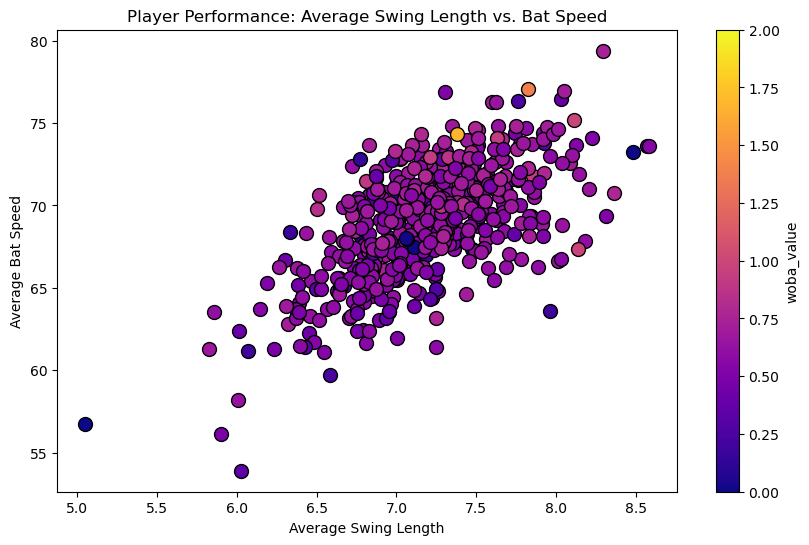

In [45]:
plt.figure(figsize=(10, 6))

for i, player in player_avg_data.iterrows():
    plt.scatter(player['avg_swing_length'], player['avg_bat_speed'], 
                color=plt.cm.plasma(player['woba_value']), label=player['player_name'], s=100, edgecolor='k')

plt.xlabel('Average Swing Length')
plt.ylabel('Average Bat Speed')
plt.title('Player Performance: Average Swing Length vs. Bat Speed')

sm = plt.cm.ScalarMappable(cmap='plasma', norm=plt.Normalize(vmin=df['woba_value'].min(), vmax=df['woba_value'].max()))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('woba_value')

plt.show()